In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 로드

In [269]:
#리뷰분석 제외 파일들
df=pd.read_csv("C:\\Users\\ihoon\\Documents\\skk\\디스커버\\인근 지하철역 정보 추가.csv",index_col=0,header=0)

In [270]:
df.head()

,gu,price,rating,nrat,sh,title,housing_type,cap,bed,room,...,clean,freeparking,laundry,camera,review_list,npho,url,locations,min_distance,subway
...1,,,,,,,,,,,,,,,,,,,,,
39,마포구,28000,5.0,4,0,NaN,2,1,1,1,...,0.0,0,0,0,"['굉장히 좋은 위치이고, 번화한 지역에 있는 것을 찾기가 매우 쉽습니다.집주인이 ...",7.0,https://www.airbnb.co.kr/rooms/52604791?adults...,"(37.55714, 126.94047)",0.375802,신촌역
48,마포구,34659,4.8,148,0,NaN,3,1,1,1,...,0.0,0,1,0,"['저렴하고 위치 최고에요 ..', '위치 최고 공간 딱 적당히 좋았어요', '좋았...",15.0,https://www.airbnb.co.kr/rooms/20552862?adults...,"(37.55899, 126.91992)",0.413784,홍대입구역
88,마포구,34659,4.8,148,0,NaN,3,1,1,1,...,0.0,0,1,0,"['저렴하고 위치 최고에요 ..', '위치 최고 공간 딱 적당히 좋았어요', '좋았...",15.0,https://www.airbnb.co.kr/rooms/20552862?adults...,"(37.55899, 126.91992)",0.413784,홍대입구역
128,마포구,34659,4.8,148,0,NaN,3,1,1,1,...,0.0,0,1,0,"['저렴하고 위치 최고에요 ..', '위치 최고 공간 딱 적당히 좋았어요', '좋았...",15.0,https://www.airbnb.co.kr/rooms/20552862?adults...,"(37.55899, 126.91992)",0.413784,홍대입구역
168,마포구,34659,4.8,148,0,NaN,3,1,1,1,...,0.0,0,1,0,"['저렴하고 위치 최고에요 ..', '위치 최고 공간 딱 적당히 좋았어요', '좋았...",15.0,https://www.airbnb.co.kr/rooms/20552862?adults...,"(37.55899, 126.91992)",0.413784,홍대입구역


In [271]:
#리뷰 스코어링 파일
pr=pd.read_csv("C:\\Users\\ihoon\\Documents\\skk\\디스커버\\pororo_scoring.csv",index_col=0,header=0)

In [272]:
pr.head()

,review_score
url,
https://www.airbnb.co.kr/rooms/36017522?adults=1&children=0&infants=0&pets=0&check_in=2023-01-13&check_out=2023-01-15&source_impression_id=p3_1669352114_hzhgEjwt910QIkpN,4.61
https://www.airbnb.co.kr/rooms/601231530238786958?adults=1&children=0&infants=0&pets=0&check_in=2023-01-06&check_out=2023-01-08&source_impression_id=p3_1669352139_ueQm2w%2BQnj0vRicR,4.78
https://www.airbnb.co.kr/rooms/43605068?adults=1&children=0&infants=0&pets=0&check_in=2023-01-20&check_out=2023-01-22&source_impression_id=p3_1669352160_qSEvkzBE72aeWWdP,4.49
https://www.airbnb.co.kr/rooms/764863519693488604?adults=1&children=0&infants=0&pets=0&check_in=2023-01-06&check_out=2023-01-08&source_impression_id=p3_1669352178_4HlMzdAiw5oA7Kx%2F,NaN
https://www.airbnb.co.kr/rooms/652561084833632730?adults=1&children=0&infants=0&pets=0&check_in=2023-01-20&check_out=2023-01-22&source_impression_id=p3_1669352208_Adj5p%2B4xX2gt92Sb,4.82


In [273]:
#두 df 조인
df=df.set_index('url').join(pr).reset_index()

# EDA

In [274]:
#컬럼 확인
df.columns

Index(['url', 'gu', 'price', 'rating', 'nrat', 'sh', 'title', 'housing_type',
       'cap', 'bed', 'room', 'bath', 'res_rate', 'cert', 'clean',
       'freeparking', 'laundry', 'camera', 'review_list', 'npho', 'locations',
       'min_distance', 'subway', 'review_score'],
      dtype='object')

In [275]:
#결측치 확인
df.isna().sum()

url               0
gu                0
price             0
rating          126
nrat              0
sh                0
title           291
housing_type      0
cap               0
bed               0
room              0
bath              0
res_rate        100
cert              0
clean            87
freeparking       0
laundry           0
camera            0
review_list       0
npho             26
locations         0
min_distance      0
subway            0
review_score    126
dtype: int64

In [276]:
#폰트 설정
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

### 데이터 분포 확인

<AxesSubplot:xlabel='price', ylabel='Count'>

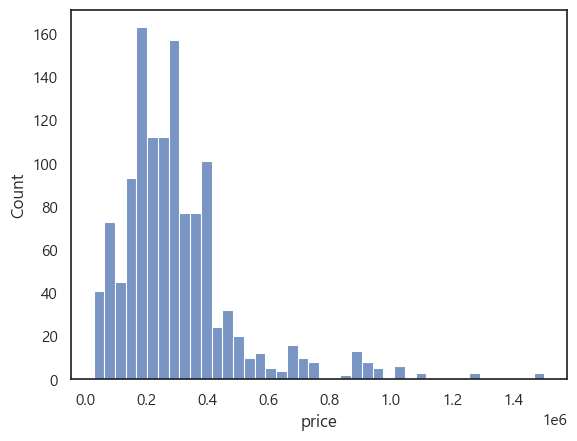

In [277]:
sns.histplot(x='price',data=df)

In [278]:
df[['gu','title']].groupby('gu').count()

,title
gu,
강남구,120
마포구,153
서대문구,222
용산구,198
종로구,140
중구,111


<AxesSubplot:xlabel='rating', ylabel='Count'>

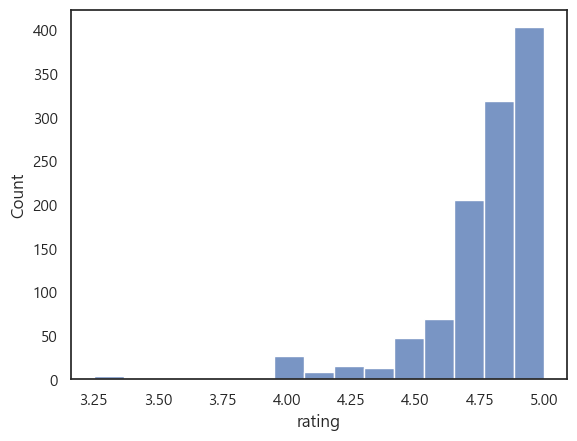

In [279]:
sns.histplot(x='rating',data=df,bins=15)

<AxesSubplot:xlabel='nrat', ylabel='Count'>

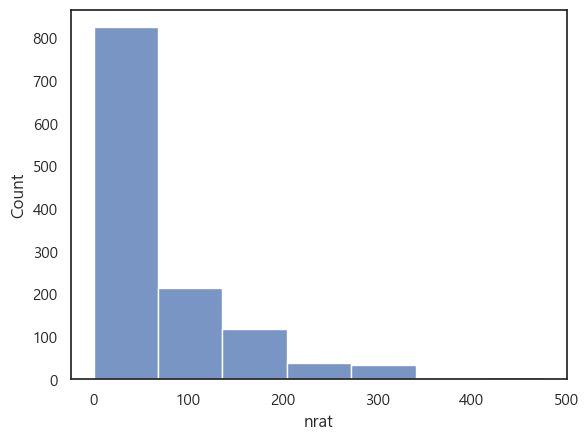

In [280]:
sns.histplot(x='nrat',data=df,bins=7)

<AxesSubplot:xlabel='sh', ylabel='Count'>

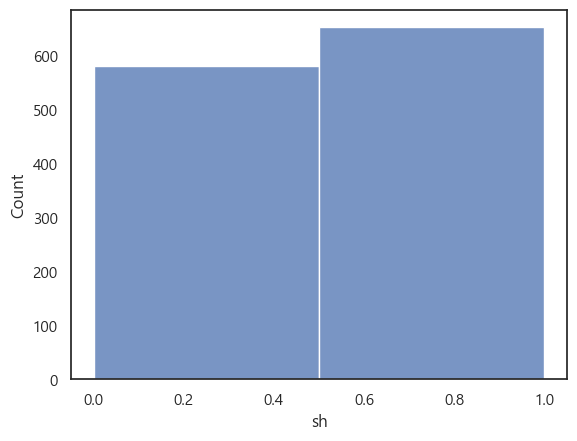

In [281]:
sns.histplot(x='sh',data=df,bins=2)

<AxesSubplot:xlabel='housing_type', ylabel='Count'>

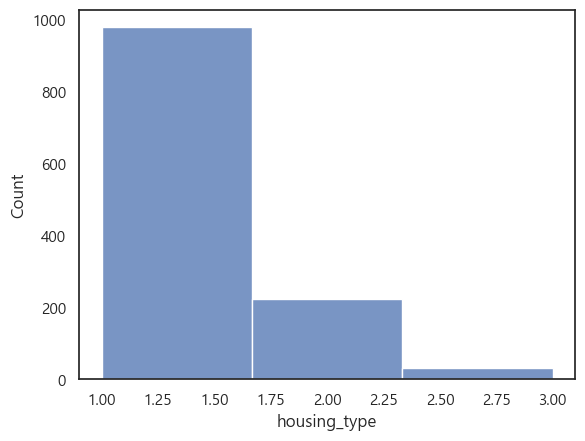

In [282]:
sns.histplot(x='housing_type',data=df,bins=3)

<AxesSubplot:xlabel='cap', ylabel='Count'>

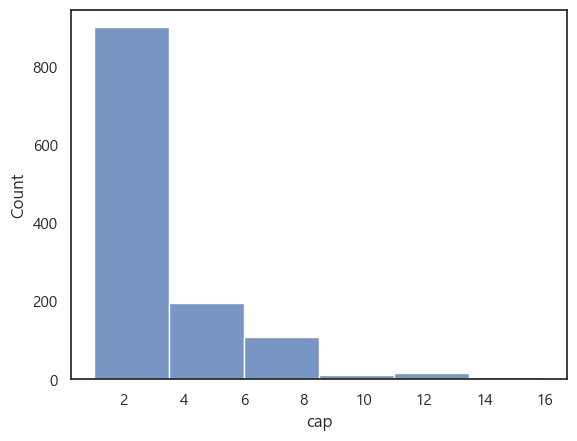

In [283]:
sns.histplot(x='cap',data=df,bins=6)

<AxesSubplot:xlabel='bed', ylabel='Count'>

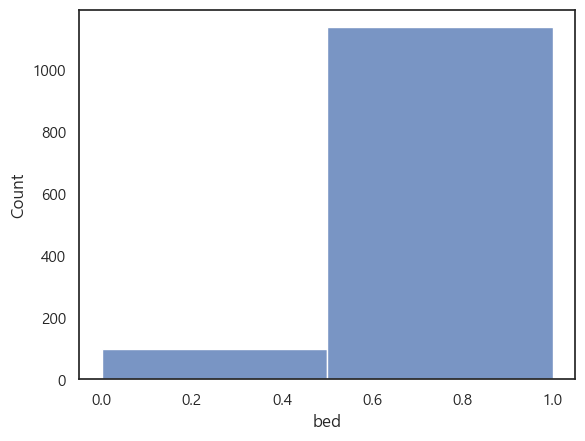

In [284]:
#침대 '개수'가 아닌 침대 '유무'임
sns.histplot(x='bed',data=df,bins=2)

<AxesSubplot:xlabel='room', ylabel='Count'>

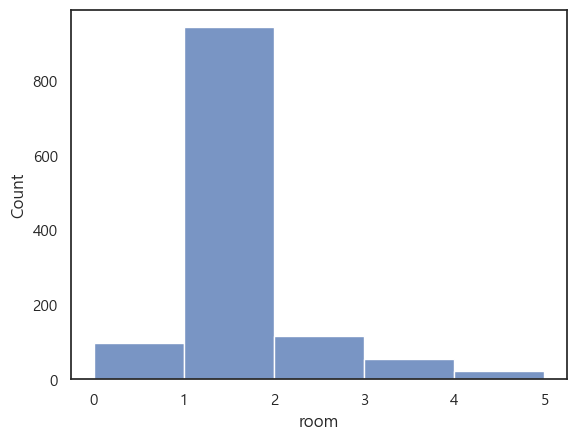

In [285]:
sns.histplot(x='room',data=df,bins=5)

<AxesSubplot:xlabel='bath', ylabel='Count'>

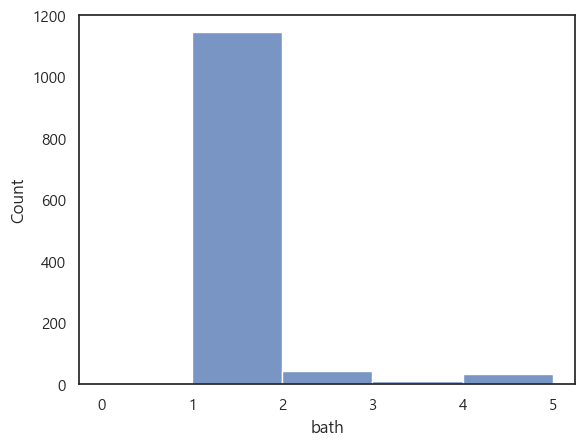

In [286]:
sns.histplot(x='bath',data=df,bins=5)

<AxesSubplot:xlabel='res_rate', ylabel='Count'>

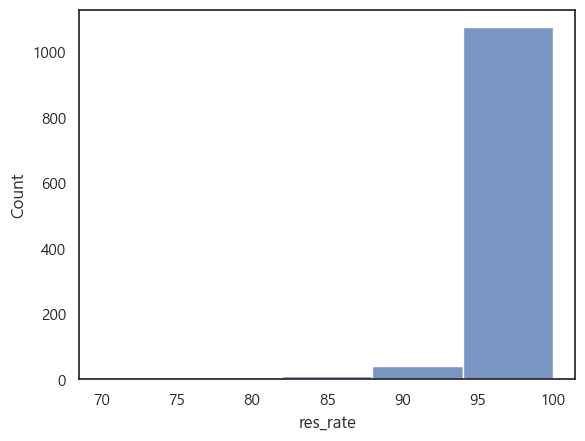

In [287]:
sns.histplot(x='res_rate',data=df,bins=5)

<AxesSubplot:xlabel='cert', ylabel='Count'>

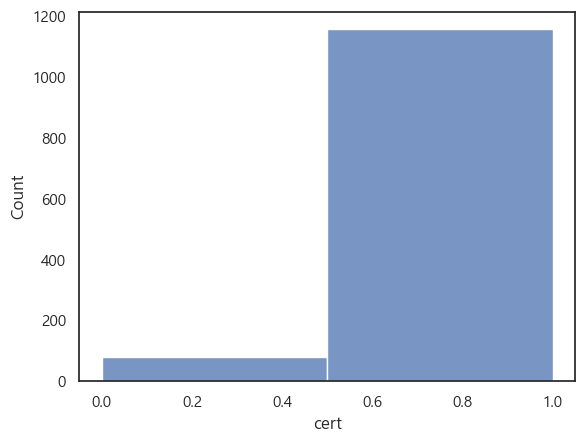

In [288]:
sns.histplot(x='cert',data=df,bins=2)

<AxesSubplot:xlabel='clean', ylabel='Count'>

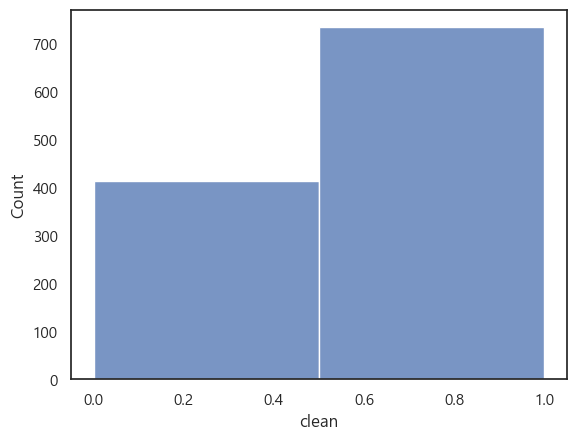

In [289]:
sns.histplot(x='clean',data=df,bins=2)

<AxesSubplot:xlabel='freeparking', ylabel='Count'>

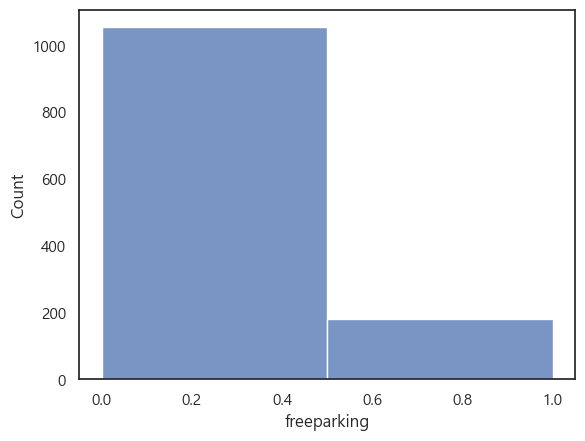

In [290]:
sns.histplot(x='freeparking',data=df,bins=2)

<AxesSubplot:xlabel='laundry', ylabel='Count'>

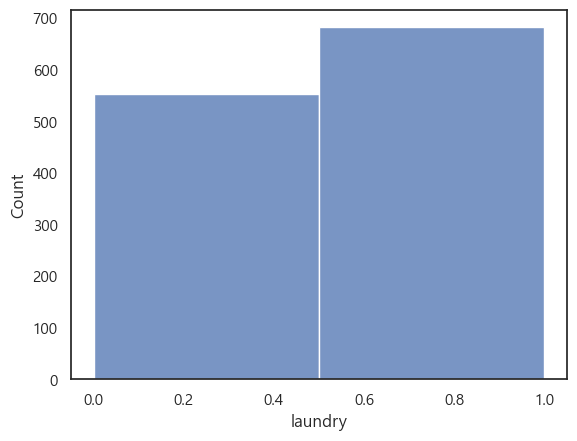

In [291]:
sns.histplot(x='laundry',data=df,bins=2)

<AxesSubplot:xlabel='camera', ylabel='Count'>

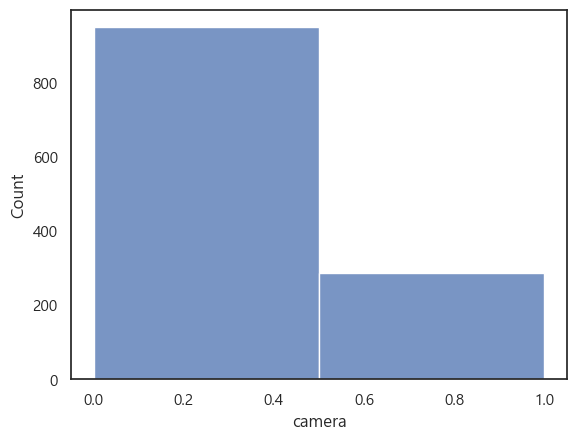

In [292]:
sns.histplot(x='camera',data=df,bins=2)

<AxesSubplot:xlabel='npho', ylabel='Count'>

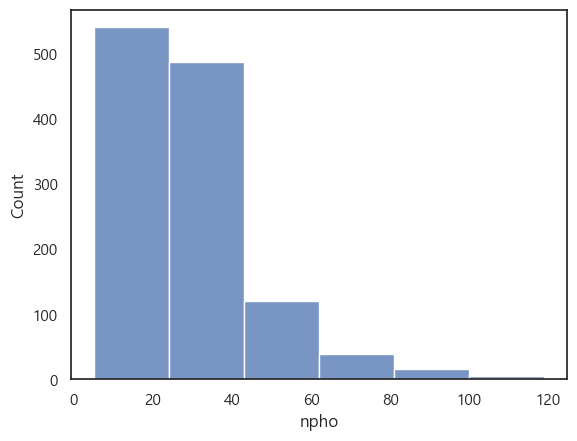

In [293]:
sns.histplot(x='npho',data=df,bins=6)

<AxesSubplot:xlabel='min_distance', ylabel='Count'>

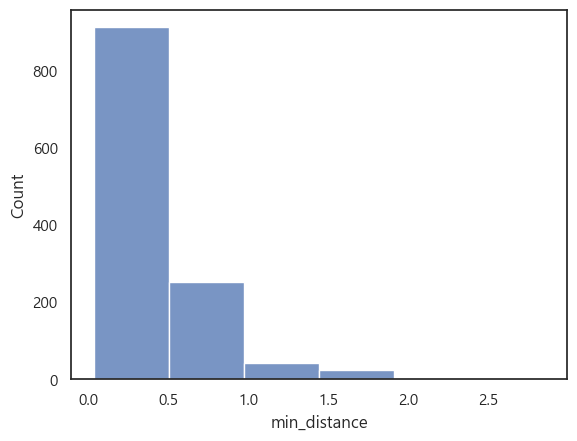

In [294]:
sns.histplot(x='min_distance',data=df,bins=6)

# 전처리
위치 기준 중복값 제거

리뷰 없는 숙소 제외
**결측값 처리**

rating(82): 평균값 대치

res_rate(63): 평균값 대치

clean(63): 1로 대치

npho(18): 평균값 대치

review_score (126): 평균값 대치


**종속변수 변환**

price: 자연로그 변환

In [295]:
#가격/사진갯수/위치 가 동일하면 같은 숙소로 판단하고 제외
df.drop_duplicates(subset=['price','npho','locations'],inplace=True)

In [296]:
#리뷰 없는 숙소 제외
df=df[df['review_list']!='[]']

In [297]:
#결측치 제거
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['res_rate'].fillna(df['res_rate'].mean(),inplace=True)
df['clean'].fillna(1,inplace=True)
df['npho'].fillna(df['npho'].mean(),inplace=True)
df['review_score'].fillna(df['review_score'].mean(),inplace=True)

In [302]:
#필요한 컬럼만
df=df[['price', 'rating', 'nrat', 'sh',
       'cap', 'bed', 'room', 'bath', 'res_rate', 'cert', 'clean',
       'freeparking', 'laundry', 'camera', 'npho',
       'min_distance','review_score']]

In [303]:
df.head()

,price,rating,nrat,sh,cap,bed,room,bath,res_rate,cert,clean,freeparking,laundry,camera,npho,min_distance,review_score
0,80870,4.82,174,0,1,1,1,1.0,100.0,1,0.0,0,0,0,15.0,0.402434,4.86
1,267772,4.81,204,0,3,0,0,1.0,100.0,1,1.0,0,0,0,60.0,0.347907,4.48
3,288550,4.97,167,1,3,1,1,1.0,100.0,1,1.0,0,0,0,76.0,0.412134,4.61
7,140120,4.75,69,0,3,1,1,1.0,91.0,1,0.0,1,1,1,15.0,0.805156,4.33
11,69318,4.53,143,0,2,1,1,1.0,100.0,1,0.0,0,1,0,44.0,1.196514,4.14


In [304]:
#종속변수 자연로그 변환
df['price_ln']=np.log(df['price'])

# EDA2

히트맵 그려 다중공선성 체크

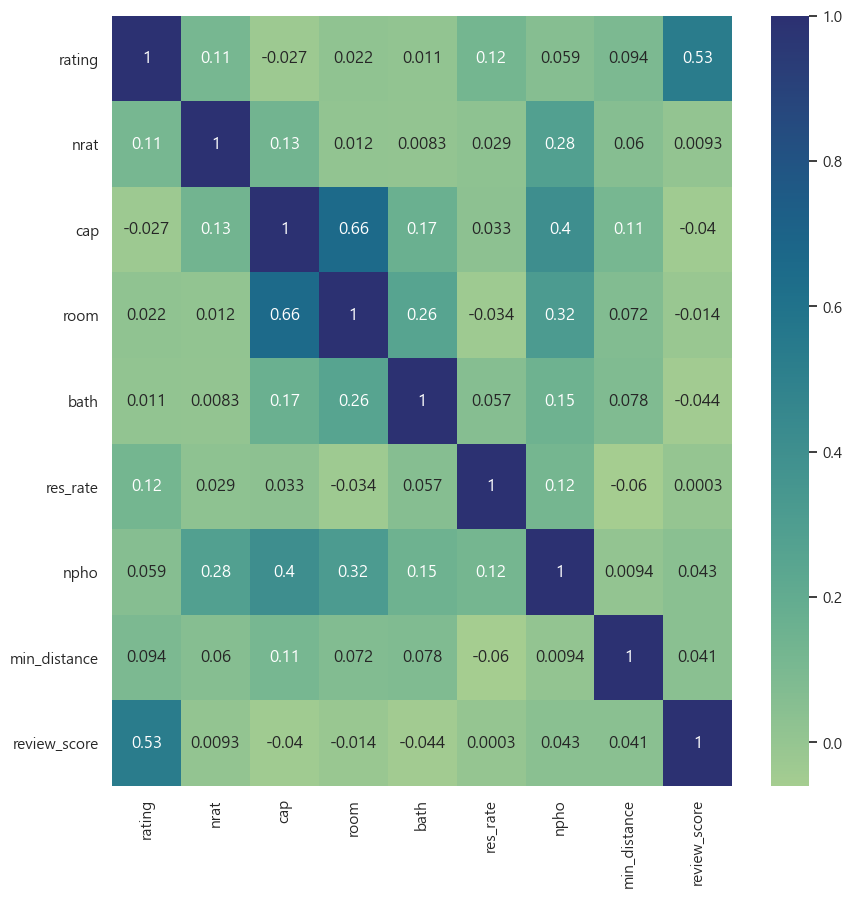

In [305]:
df_heat=df[['rating','nrat','cap','room','bath','res_rate','npho','min_distance','review_score']]
df_corr=df_heat.corr()
plt.figure(figsize=(10,10))
ax=sns.heatmap(df_corr,annot=True,cmap="crest")

# 회귀분석
일단 피처 다 사용

In [306]:
#다중세미로그회귀
y_col = ['price_ln']
x_cols = ['rating','nrat','C(sh)','cap','room','C(bed)','bath','res_rate',\
          'C(cert)','C(clean)','C(freeparking)','C(laundry)',\
        'C(camera)','npho','min_distance','review_score',\
        ]
formula=f"{y_col[0]}~"+"+".join(x_cols)
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     19.52
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.79e-39
Time:                        23:21:06   Log-Likelihood:                -240.76
No. Observations:                 356   AIC:                             515.5
Df Residuals:                     339   BIC:                             581.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.4232    